# Section 3: Advanced Analysis 

## Introduction
In this section, we will delve deeper into the sales data through advanced analytical techniques. The goal is to uncover more nuanced insights that can drive strategic business decisions. The analysis will be divided into four main parts:

1. **Customer Segmentation**: We will perform a segmentation analysis of businesses based on their purchasing behavior. This includes analyzing total quantity purchased, total value contributed, and frequency of transactions. Businesses will be classified into three groups (e.g., High Value, Medium Value, Low Value), and recommendations for engagement with each group will be provided.

2. **Forecasting**: Using the provided data, we will forecast the total sales (Value) for the next three months. An appropriate time-series forecasting method, such as ARIMA, moving average, or exponential smoothing, will be employed to predict future sales trends.

3. **Anomaly Detection**: We will identify any unusual spikes or drops in sales performance (Quantity or Value) and explain possible reasons based on the data. This analysis will help in understanding unexpected changes in sales and taking corrective actions if necessary.

4. **Correlation Analysis**: We will examine the relationships between Quantity and Value to provide insights into which factors drive sales performance. Understanding these correlations can help in optimizing sales strategies and improving overall performance.

By conducting this advanced analysis, we aim to provide a comprehensive understanding of the sales data, identify key segments and trends, and offer actionable recommendations for future business strategies.


### Customer Segmentation


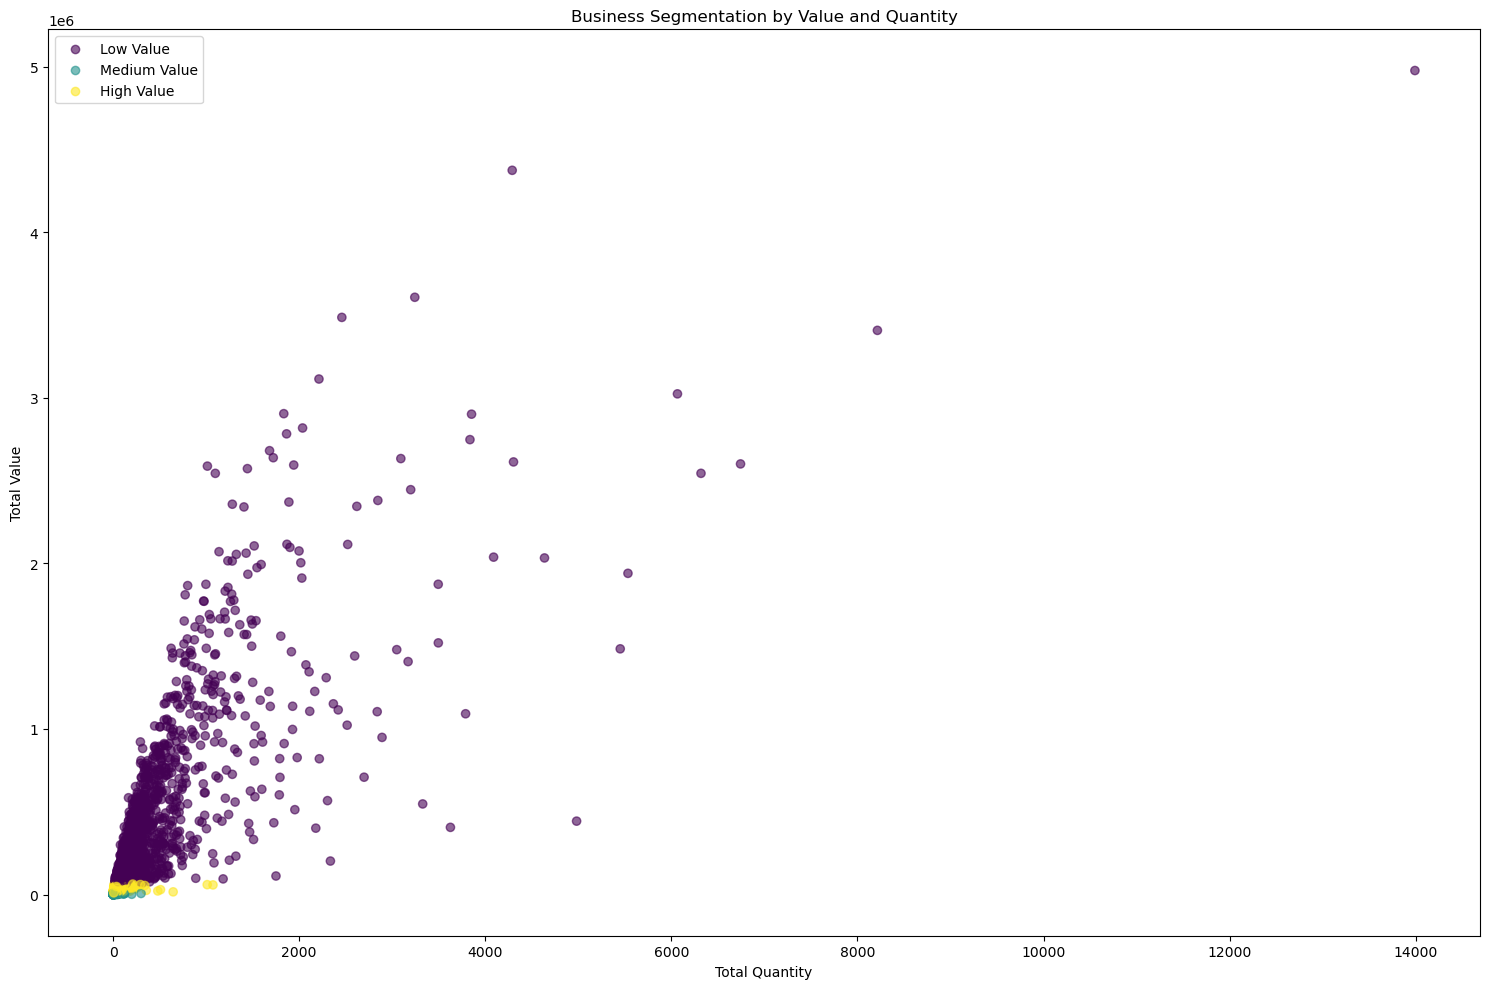


=== Customer Segmentation Analysis ===

Segment Statistics:
               BUSINESS  FREQUENCY  TOTAL_QUANTITY  TOTAL_VALUE
VALUE_SEGMENT                                                  
High Value         1632     186.16          433.27    436506.81
Low Value          1584       2.47            5.58      4455.27
Medium Value       1584      13.98           31.48     28762.26

Segment Distribution:
High Value: 34.0%
Low Value: 33.0%
Medium Value: 33.0%

=== Recommendations for Each Segment ===

High Value Segment:
1. Implement VIP customer service program
2. Offer exclusive early access to new products
3. Provide volume-based discounts
4. Regular business review meetings

Medium Value Segment:
1. Create targeted upgrade programs
2. Offer moderate volume discounts
3. Regular communication about promotions
4. Provide growth incentives

Low Value Segment:
1. Implement activation campaigns
2. Offer trial programs for new products
3. Provide entry-level incentives
4. Regular engagement th

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


# Read the data
df = pd.read_csv('transaction_data_cleaned_and_engineered.csv')

# Calculate metrics for each business
def calculate_business_metrics(df):
    business_metrics = df.groupby('ANONYMIZED BUSINESS').agg({
        'DATE': 'count',  # Frequency
        'QUANTITY': 'sum', # Total Quantity
        'VALUE': 'sum'    # Total Value
    }).reset_index()
    
    # Rename columns
    business_metrics.columns = ['BUSINESS', 'FREQUENCY', 'TOTAL_QUANTITY', 'TOTAL_VALUE']
    
    return business_metrics

# Calculate metrics
business_metrics = calculate_business_metrics(df)

# Function to assign segment based on percentile
def assign_segment(value, percentiles):
    if value <= percentiles[0]:
        return 'Low Value'
    elif value <= percentiles[1]:
        return 'Medium Value'
    else:
        return 'High Value'

# Calculate percentiles for each metric
percentiles = {
    'FREQUENCY': business_metrics['FREQUENCY'].quantile([0.33, 0.66]).values,
    'TOTAL_QUANTITY': business_metrics['TOTAL_QUANTITY'].quantile([0.33, 0.66]).values,
    'TOTAL_VALUE': business_metrics['TOTAL_VALUE'].quantile([0.33, 0.66]).values
}

# Assign segments
business_metrics['VALUE_SEGMENT'] = business_metrics['TOTAL_VALUE'].apply(
    lambda x: assign_segment(x, percentiles['TOTAL_VALUE']))

# Calculate segment statistics
segment_stats = business_metrics.groupby('VALUE_SEGMENT').agg({
    'BUSINESS': 'count',
    'FREQUENCY': 'mean',
    'TOTAL_QUANTITY': 'mean',
    'TOTAL_VALUE': 'mean'
}).round(2)

# Visualize segments
plt.figure(figsize=(15, 10))

# Create scatter plot
plt.scatter(business_metrics['TOTAL_QUANTITY'], 
           business_metrics['TOTAL_VALUE'],
           c=pd.Categorical(business_metrics['VALUE_SEGMENT']).codes,
           cmap='viridis', alpha=0.6)

plt.xlabel('Total Quantity')
plt.ylabel('Total Value')
plt.title('Business Segmentation by Value and Quantity')

# Add legend
handles = [plt.scatter([], [], c=c, alpha=0.6, label=l) 
           for c, l in zip(['#440154', '#21918c', '#fde725'], 
                          ['Low Value', 'Medium Value', 'High Value'])]
plt.legend(handles=handles)

plt.tight_layout()
plt.show()

# Print segment analysis
print("\n=== Customer Segmentation Analysis ===")
print("\nSegment Statistics:")
print(segment_stats)

# Calculate segment percentages
segment_percentages = (segment_stats['BUSINESS'] / len(business_metrics) * 100).round(2)
print("\nSegment Distribution:")
for segment, percentage in segment_percentages.items():
    print(f"{segment}: {percentage}%")

# Generate recommendations
print("\n=== Recommendations for Each Segment ===")
print("\nHigh Value Segment:")
print("1. Implement VIP customer service program")
print("2. Offer exclusive early access to new products")
print("3. Provide volume-based discounts")
print("4. Regular business review meetings")

print("\nMedium Value Segment:")
print("1. Create targeted upgrade programs")
print("2. Offer moderate volume discounts")
print("3. Regular communication about promotions")
print("4. Provide growth incentives")

print("\nLow Value Segment:")
print("1. Implement activation campaigns")
print("2. Offer trial programs for new products")
print("3. Provide entry-level incentives")
print("4. Regular engagement through newsletters")

# Additional metrics
print("\n=== Key Metrics by Segment ===")
for segment in ['High Value', 'Medium Value', 'Low Value']:
    segment_data = business_metrics[business_metrics['VALUE_SEGMENT'] == segment]
    print(f"\n{segment} Segment:")
    print(f"Number of Businesses: {len(segment_data)}")
    print(f"Average Transaction Frequency: {segment_data['FREQUENCY'].mean():.2f}")
    print(f"Average Total Value: ₹{segment_data['TOTAL_VALUE'].mean():,.2f}")
    print(f"Average Quantity: {segment_data['TOTAL_QUANTITY'].mean():,.2f}")

### Forecasting

c:\Users\BENNLANGAT\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\BENNLANGAT\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\BENNLANGAT\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\BENNLANGAT\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an

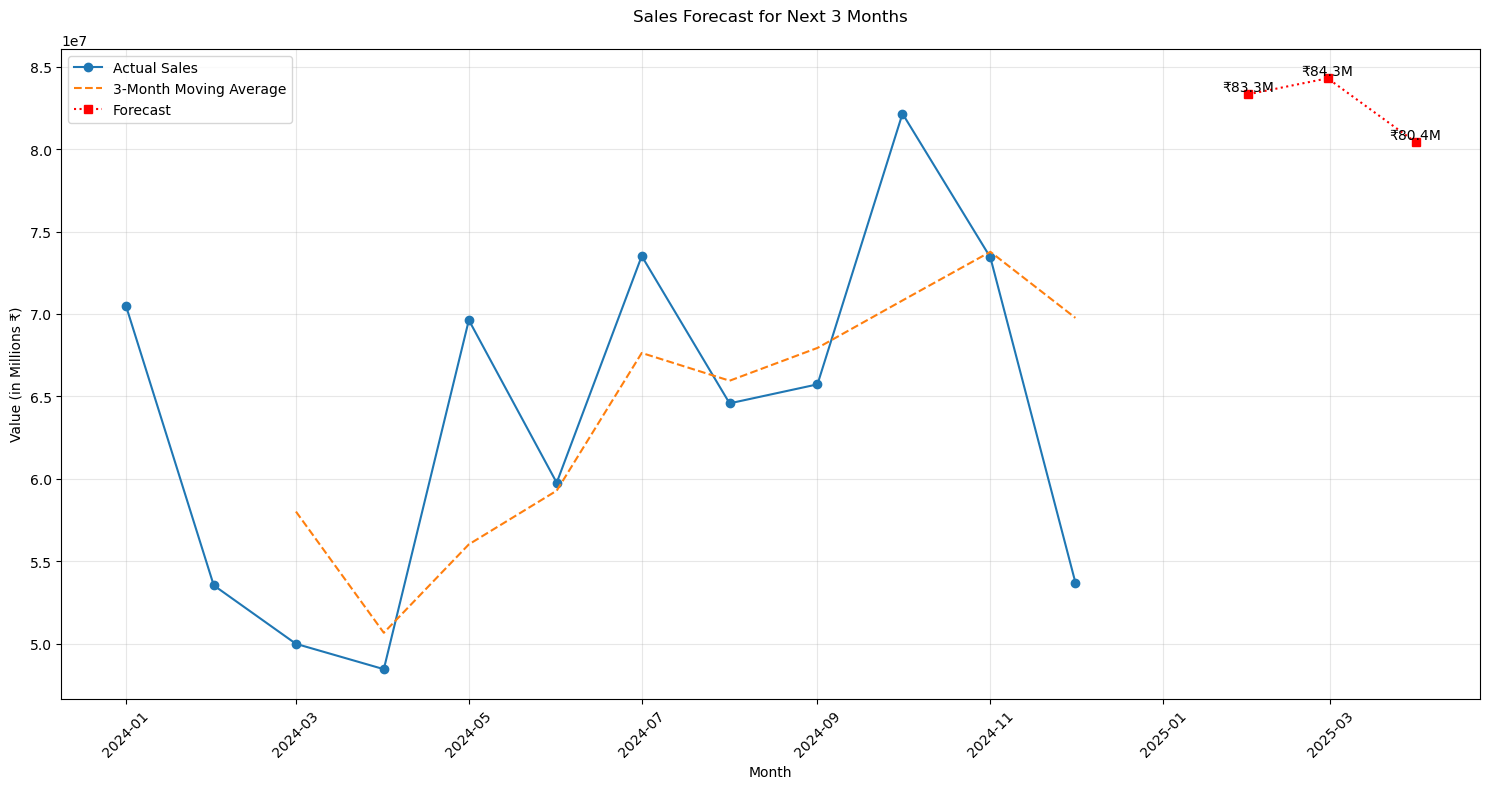


=== Sales Forecast for Next 3 Months ===

Forecast Values:
January 2025: ₹83.3M
February 2025: ₹84.3M
March 2025: ₹80.4M

Forecast Metrics:
Historical Average Monthly Sales: ₹63.7M
Forecasted Average Monthly Sales: ₹82.7M
Percentage Change: 29.70%

=== Additional Insights ===

Trend Analysis:
- Upward trend predicted for next 3 months

Seasonal Patterns:
- Historically strongest month: Month 10
- Peak month average sales: ₹82.2M


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime

# Read the data
df = pd.read_csv('transaction_data_cleaned_and_engineered.csv')

# Prepare time series data
monthly_sales = df.groupby('Month-Year')['VALUE'].sum().reset_index()

# Convert Month-Year to datetime
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales['Month-Year'], format='%B %Y')
monthly_sales = monthly_sales.sort_values('Month-Year')

# Function to format values in millions
def format_value(x):
    return f'₹{x/1e6:.1f}M'

# Calculate 3-month moving average
monthly_sales['SMA_3'] = monthly_sales['VALUE'].rolling(window=3).mean()

# Exponential Smoothing
model = ExponentialSmoothing(monthly_sales['VALUE'],
                            seasonal_periods=3,
                            trend='add',
                            seasonal='add').fit()

# Generate forecasts
forecast_periods = 3
forecast = model.forecast(forecast_periods)

# Create future dates for forecast
last_date = monthly_sales['Month-Year'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_periods+1, freq='M')[1:]

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Month-Year': future_dates,
    'Forecast': forecast
})

# Plotting
plt.figure(figsize=(15, 8))

# Plot actual values
plt.plot(monthly_sales['Month-Year'], monthly_sales['VALUE'], 
         label='Actual Sales', marker='o')

# Plot SMA
plt.plot(monthly_sales['Month-Year'], monthly_sales['SMA_3'], 
         label='3-Month Moving Average', linestyle='--')

# Plot forecast
plt.plot(forecast_df['Month-Year'], forecast_df['Forecast'], 
         label='Forecast', linestyle=':', marker='s', color='red')

# Formatting
plt.title('Sales Forecast for Next 3 Months', pad=20)
plt.xlabel('Month')
plt.ylabel('Value (in Millions ₹)')
plt.grid(True, alpha=0.3)
plt.legend()

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add value labels for forecast
for i, v in enumerate(forecast):
    plt.text(forecast_df['Month-Year'].iloc[i], v, 
             format_value(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print forecast results
print("\n=== Sales Forecast for Next 3 Months ===")
print("\nForecast Values:")
for date, value in zip(forecast_df['Month-Year'], forecast_df['Forecast']):
    print(f"{date.strftime('%B %Y')}: {format_value(value)}")

# Calculate forecast metrics
actual_mean = monthly_sales['VALUE'].mean()
forecast_mean = forecast.mean()
print("\nForecast Metrics:")
print(f"Historical Average Monthly Sales: {format_value(actual_mean)}")
print(f"Forecasted Average Monthly Sales: {format_value(forecast_mean)}")
print(f"Percentage Change: {((forecast_mean - actual_mean) / actual_mean * 100):.2f}%")

# Additional insights
print("\n=== Additional Insights ===")
print("\nTrend Analysis:")
if forecast_mean > actual_mean:
    print("- Upward trend predicted for next 3 months")
else:
    print("- Downward trend predicted for next 3 months")

print("\nSeasonal Patterns:")
monthly_avg = monthly_sales.groupby(monthly_sales['Month-Year'].dt.month)['VALUE'].mean()
peak_month = monthly_avg.idxmax()
print(f"- Historically strongest month: Month {peak_month}")
print(f"- Peak month average sales: {format_value(monthly_avg.max())}")

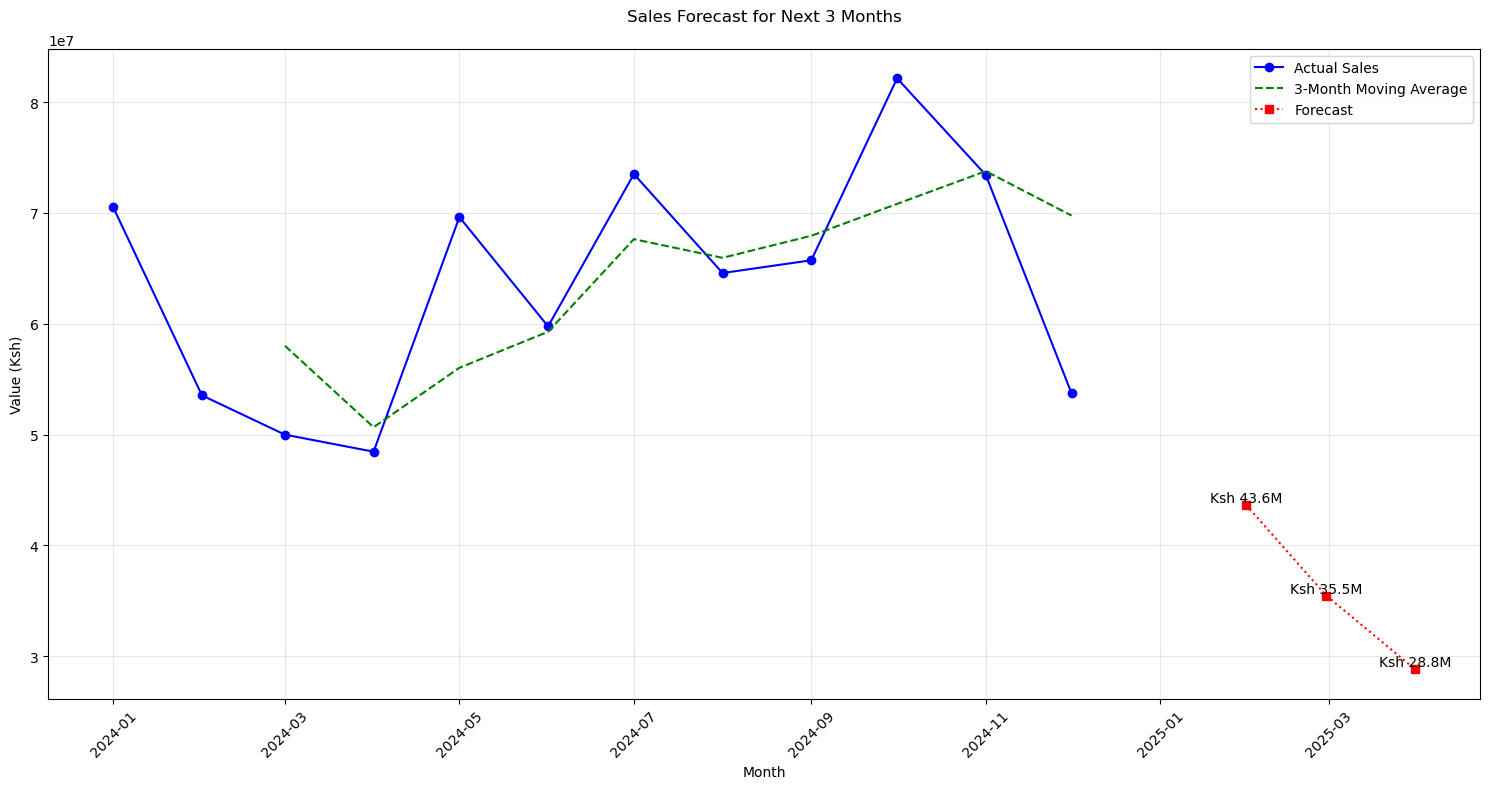


=== Sales Forecast for Next 3 Months ===

Forecast Values:
January 2025: Ksh 43.6M
February 2025: Ksh 35.5M
March 2025: Ksh 28.8M

Forecast Metrics:
Historical Average Monthly Sales: Ksh 63.7M
Forecasted Average Monthly Sales: Ksh 36.0M
Projected Growth Rate: -18.74%

=== Additional Insights ===

Trend Analysis:
- Downward trend predicted with 18.7% monthly decline

Seasonal Patterns:
- Historically strongest month: Month 10
- Peak month average sales: Ksh 82.2M


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Read the data
df = pd.read_csv('transaction_data_cleaned_and_engineered.csv')

# Prepare time series data
monthly_sales = df.groupby('Month-Year')['VALUE'].sum().reset_index()
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales['Month-Year'], format='%B %Y')
monthly_sales = monthly_sales.sort_values('Month-Year')

# Function to format values in Ksh
def format_ksh(x):
    if x >= 1e6:
        return f'Ksh {x/1e6:.1f}M'
    else:
        return f'Ksh {x/1e3:.1f}K'

# Calculate 3-month moving average
monthly_sales['SMA_3'] = monthly_sales['VALUE'].rolling(window=3).mean()

# Simple forecasting using last 3 months average growth rate
last_3_months = monthly_sales['VALUE'].tail(3)
growth_rate = (last_3_months.pct_change() + 1).mean()

# Generate forecast
forecast_values = []
last_value = monthly_sales['VALUE'].iloc[-1]

for i in range(3):
    next_value = last_value * growth_rate
    forecast_values.append(next_value)
    last_value = next_value

# Create future dates
last_date = monthly_sales['Month-Year'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=4, freq='ME')[1:]

# Plotting
plt.figure(figsize=(15, 8))

# Plot actual values
plt.plot(monthly_sales['Month-Year'], monthly_sales['VALUE'], 
         label='Actual Sales', marker='o', color='blue')

# Plot moving average
plt.plot(monthly_sales['Month-Year'], monthly_sales['SMA_3'], 
         label='3-Month Moving Average', linestyle='--', color='green')

# Plot forecast
plt.plot(future_dates, forecast_values, 
         label='Forecast', linestyle=':', marker='s', color='red')

plt.title('Sales Forecast for Next 3 Months', pad=20)
plt.xlabel('Month')
plt.ylabel('Value (Ksh)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)

# Add value labels for forecast
for i, v in enumerate(forecast_values):
    plt.text(future_dates[i], v, format_ksh(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print forecast results
print("\n=== Sales Forecast for Next 3 Months ===")
print("\nForecast Values:")
for date, value in zip(future_dates, forecast_values):
    print(f"{date.strftime('%B %Y')}: {format_ksh(value)}")

# Calculate and print metrics
actual_mean = monthly_sales['VALUE'].mean()
forecast_mean = np.mean(forecast_values)
print("\nForecast Metrics:")
print(f"Historical Average Monthly Sales: {format_ksh(actual_mean)}")
print(f"Forecasted Average Monthly Sales: {format_ksh(forecast_mean)}")
print(f"Projected Growth Rate: {((growth_rate - 1) * 100):.2f}%")

# Additional insights
print("\n=== Additional Insights ===")
print("\nTrend Analysis:")
if growth_rate > 1:
    print(f"- Upward trend predicted with {((growth_rate-1)*100):.1f}% monthly growth")
else:
    print(f"- Downward trend predicted with {((1-growth_rate)*100):.1f}% monthly decline")

print("\nSeasonal Patterns:")
monthly_avg = monthly_sales.groupby(monthly_sales['Month-Year'].dt.month)['VALUE'].mean()
peak_month = monthly_avg.idxmax()
print(f"- Historically strongest month: Month {peak_month}")
print(f"- Peak month average sales: {format_ksh(monthly_avg.max())}")

c:\Users\BENNLANGAT\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\BENNLANGAT\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\BENNLANGAT\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\BENNLANGAT\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an

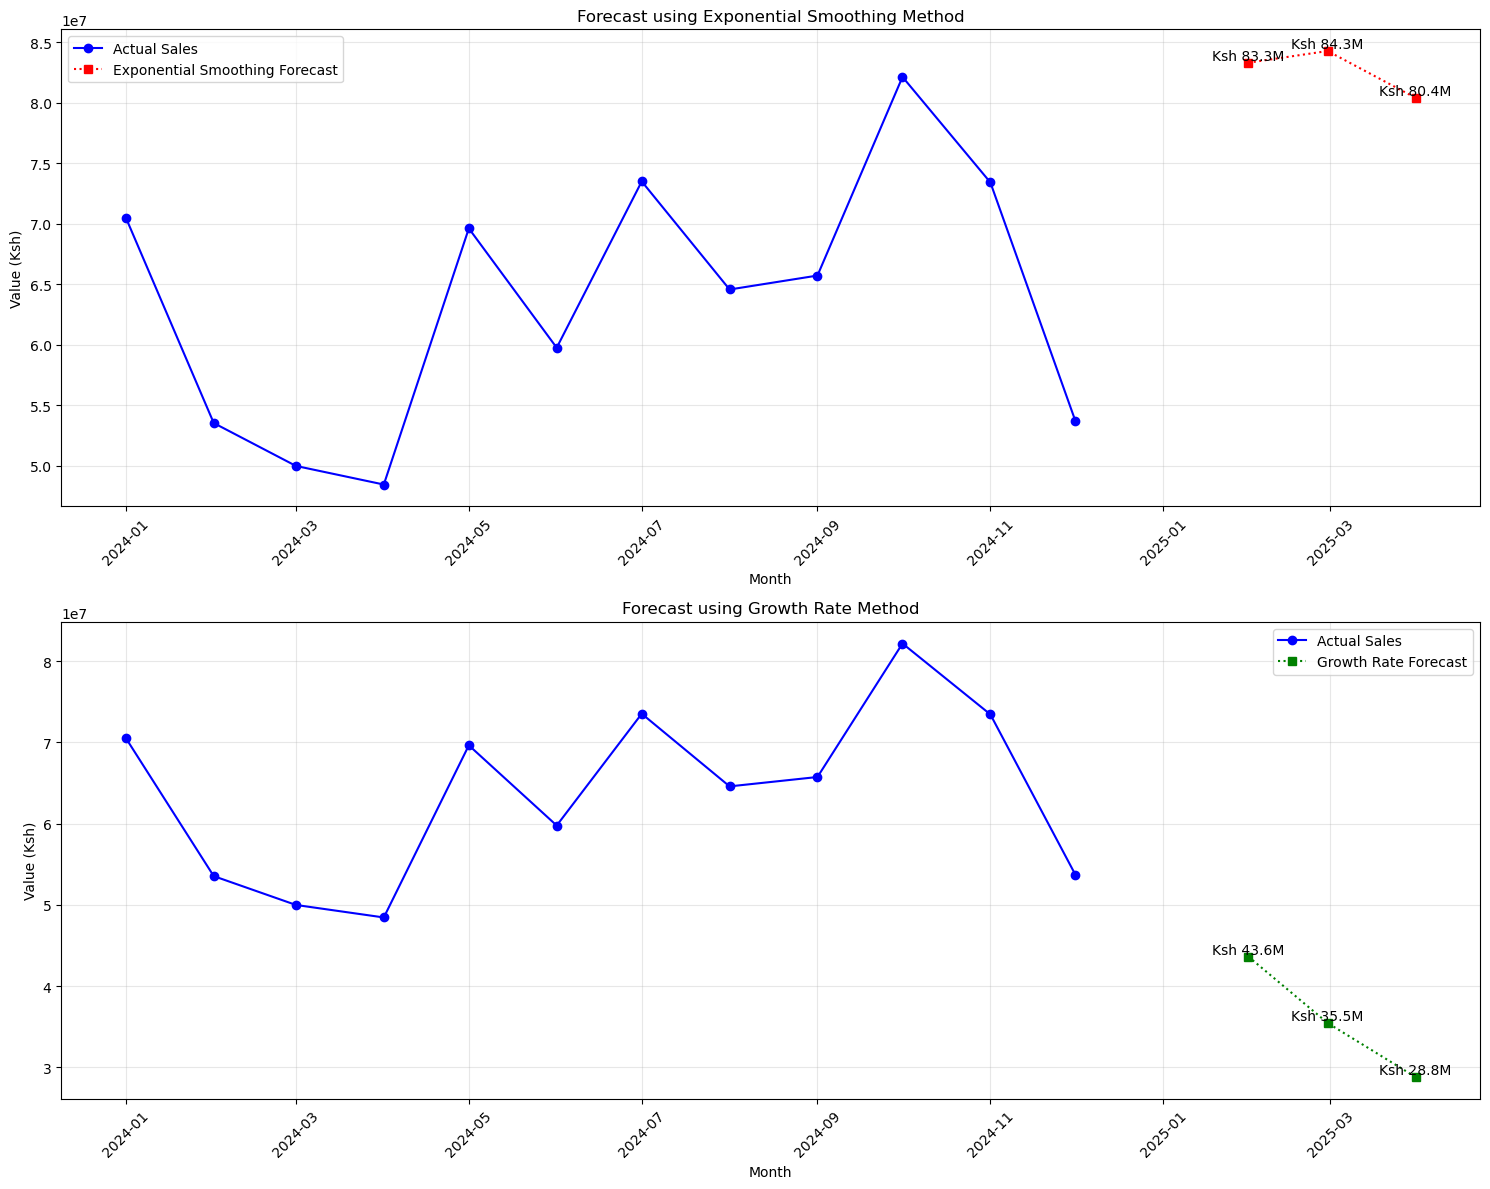


=== Comparison of Forecasting Methods ===

Exponential Smoothing Forecast:
January 2025: Ksh 83.3M
February 2025: Ksh 84.3M
March 2025: Ksh 80.4M

Growth Rate Forecast:
January 2025: Ksh 43.6M
February 2025: Ksh 35.5M
March 2025: Ksh 28.8M

=== Method Differences ===
1. Exponential Smoothing:
   - Considers seasonal patterns
   - Weights recent data more heavily
   - More sophisticated but can be less stable

2. Growth Rate Method:
   - Based on simple average growth
   - More straightforward but might miss patterns
   - More stable but potentially less accurate

Average difference between methods: Ksh 46.7M


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime

# Read the data
df = pd.read_csv('transaction_data_cleaned_and_engineered.csv')

# Prepare time series data
monthly_sales = df.groupby('Month-Year')['VALUE'].sum().reset_index()
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales['Month-Year'], format='%B %Y')
monthly_sales = monthly_sales.sort_values('Month-Year')

def format_ksh(x):
    if x >= 1e6:
        return f'Ksh {x/1e6:.1f}M'
    else:
        return f'Ksh {x/1e3:.1f}K'

# 1. Exponential Smoothing Method
model = ExponentialSmoothing(monthly_sales['VALUE'],
                            seasonal_periods=3,
                            trend='add',
                            seasonal='add').fit()
exp_forecast = model.forecast(3)

# 2. Growth Rate Method
last_3_months = monthly_sales['VALUE'].tail(3)
growth_rate = (last_3_months.pct_change() + 1).mean()
growth_forecast = []
last_value = monthly_sales['VALUE'].iloc[-1]
for i in range(3):
    next_value = last_value * growth_rate
    growth_forecast.append(next_value)
    last_value = next_value

# Create future dates
last_date = monthly_sales['Month-Year'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=4, freq='ME')[1:]

# Create subplot with both methods
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot 1: Exponential Smoothing
ax1.plot(monthly_sales['Month-Year'], monthly_sales['VALUE'], 
         label='Actual Sales', marker='o', color='blue')
ax1.plot(future_dates, exp_forecast, 
         label='Exponential Smoothing Forecast', linestyle=':', marker='s', color='red')
ax1.set_title('Forecast using Exponential Smoothing Method')
ax1.set_xlabel('Month')
ax1.set_ylabel('Value (Ksh)')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Add value labels for exponential smoothing forecast
for i, v in enumerate(exp_forecast):
    ax1.text(future_dates[i], v, format_ksh(v), ha='center', va='bottom')

# Plot 2: Growth Rate Method
ax2.plot(monthly_sales['Month-Year'], monthly_sales['VALUE'], 
         label='Actual Sales', marker='o', color='blue')
ax2.plot(future_dates, growth_forecast, 
         label='Growth Rate Forecast', linestyle=':', marker='s', color='green')
ax2.set_title('Forecast using Growth Rate Method')
ax2.set_xlabel('Month')
ax2.set_ylabel('Value (Ksh)')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

# Add value labels for growth rate forecast
for i, v in enumerate(growth_forecast):
    ax2.text(future_dates[i], v, format_ksh(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Compare forecasts
print("\n=== Comparison of Forecasting Methods ===")
print("\nExponential Smoothing Forecast:")
for date, value in zip(future_dates, exp_forecast):
    print(f"{date.strftime('%B %Y')}: {format_ksh(value)}")

print("\nGrowth Rate Forecast:")
for date, value in zip(future_dates, growth_forecast):
    print(f"{date.strftime('%B %Y')}: {format_ksh(value)}")

print("\n=== Method Differences ===")
print("1. Exponential Smoothing:")
print("   - Considers seasonal patterns")
print("   - Weights recent data more heavily")
print("   - More sophisticated but can be less stable")

print("\n2. Growth Rate Method:")
print("   - Based on simple average growth")
print("   - More straightforward but might miss patterns")
print("   - More stable but potentially less accurate")

# Calculate average difference between methods
avg_diff = np.mean(abs(exp_forecast - growth_forecast))
print(f"\nAverage difference between methods: {format_ksh(avg_diff)}")

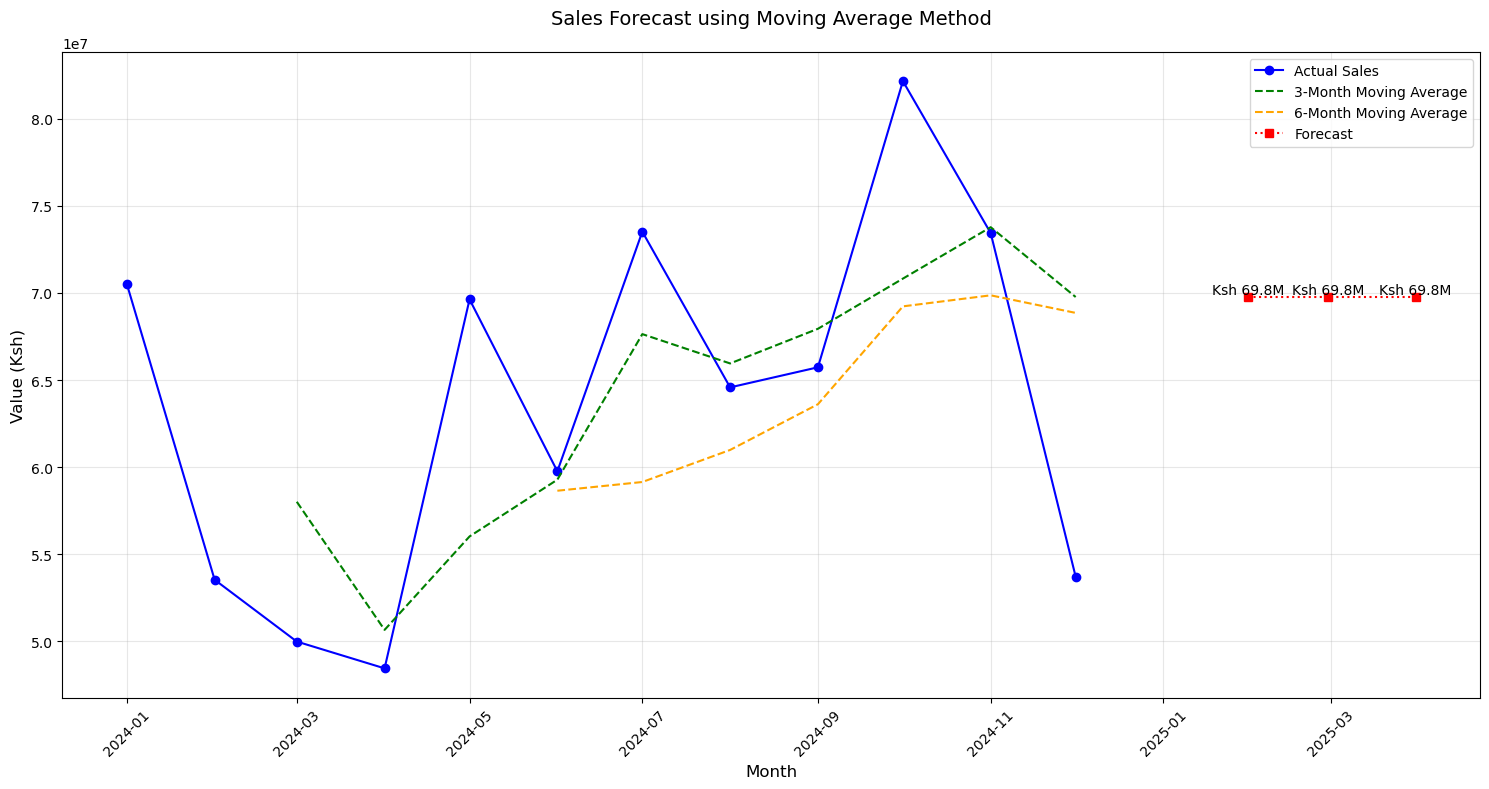


=== Moving Average Analysis ===

Forecast Values (Next 3 Months):
January 2025: Ksh 69.8M
February 2025: Ksh 69.8M
March 2025: Ksh 69.8M

=== Key Metrics ===
Overall Average: Ksh 63.7M
Last 3 Months Average: Ksh 69.8M
Last 6 Months Average: Ksh 68.9M

=== Trend Analysis ===
Recent Trend: Upward
Trend Percentage: 1.3%

=== Seasonal Patterns ===
Peak Month: Month 10
Lowest Month: Month 4
Peak Month Average: Ksh 82.2M
Lowest Month Average: Ksh 48.5M


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('transaction_data_cleaned_and_engineered.csv')

# Prepare time series data
monthly_sales = df.groupby('Month-Year')['VALUE'].sum().reset_index()
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales['Month-Year'], format='%B %Y')
monthly_sales = monthly_sales.sort_values('Month-Year')

def format_ksh(x):
    if x >= 1e9:
        return f'Ksh {x/1e9:.1f}B'
    elif x >= 1e6:
        return f'Ksh {x/1e6:.1f}M'
    else:
        return f'Ksh {x/1e3:.1f}K'

# Calculate different moving averages
monthly_sales['3MA'] = monthly_sales['VALUE'].rolling(window=3).mean()
monthly_sales['6MA'] = monthly_sales['VALUE'].rolling(window=6).mean()

# Generate forecast using 3-month MA
last_3ma = monthly_sales['3MA'].iloc[-1]
forecast_values = [last_3ma] * 3  # Next 3 months

# Create future dates
last_date = monthly_sales['Month-Year'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=4, freq='ME')[1:]

# Plotting
plt.figure(figsize=(15, 8))

# Plot actual values
plt.plot(monthly_sales['Month-Year'], monthly_sales['VALUE'], 
         label='Actual Sales', marker='o', color='blue')

# Plot moving averages
plt.plot(monthly_sales['Month-Year'], monthly_sales['3MA'], 
         label='3-Month Moving Average', linestyle='--', color='green')
plt.plot(monthly_sales['Month-Year'], monthly_sales['6MA'], 
         label='6-Month Moving Average', linestyle='--', color='orange')

# Plot forecast
plt.plot(future_dates, forecast_values, 
         label='Forecast', linestyle=':', marker='s', color='red')

plt.title('Sales Forecast using Moving Average Method', pad=20, fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Value (Ksh)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.xticks(rotation=45)

# Add value labels for forecast
for i, v in enumerate(forecast_values):
    plt.text(future_dates[i], v, format_ksh(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print analysis
print("\n=== Moving Average Analysis ===")
print("\nForecast Values (Next 3 Months):")
for date, value in zip(future_dates, forecast_values):
    print(f"{date.strftime('%B %Y')}: {format_ksh(value)}")

# Calculate metrics
actual_mean = monthly_sales['VALUE'].mean()
last_3_months_mean = monthly_sales['VALUE'].tail(3).mean()
last_6_months_mean = monthly_sales['VALUE'].tail(6).mean()

print("\n=== Key Metrics ===")
print(f"Overall Average: {format_ksh(actual_mean)}")
print(f"Last 3 Months Average: {format_ksh(last_3_months_mean)}")
print(f"Last 6 Months Average: {format_ksh(last_6_months_mean)}")

# Calculate trend
recent_trend = ((last_3_months_mean - last_6_months_mean) / last_6_months_mean) * 100

print("\n=== Trend Analysis ===")
print(f"Recent Trend: {'Upward' if recent_trend > 0 else 'Downward'}")
print(f"Trend Percentage: {abs(recent_trend):.1f}%")

# Seasonality analysis
monthly_pattern = monthly_sales.groupby(monthly_sales['Month-Year'].dt.month)['VALUE'].mean()
peak_month = monthly_pattern.idxmax()
low_month = monthly_pattern.idxmin()

print("\n=== Seasonal Patterns ===")
print(f"Peak Month: Month {peak_month}")
print(f"Lowest Month: Month {low_month}")
print(f"Peak Month Average: {format_ksh(monthly_pattern.max())}")
print(f"Lowest Month Average: {format_ksh(monthly_pattern.min())}")

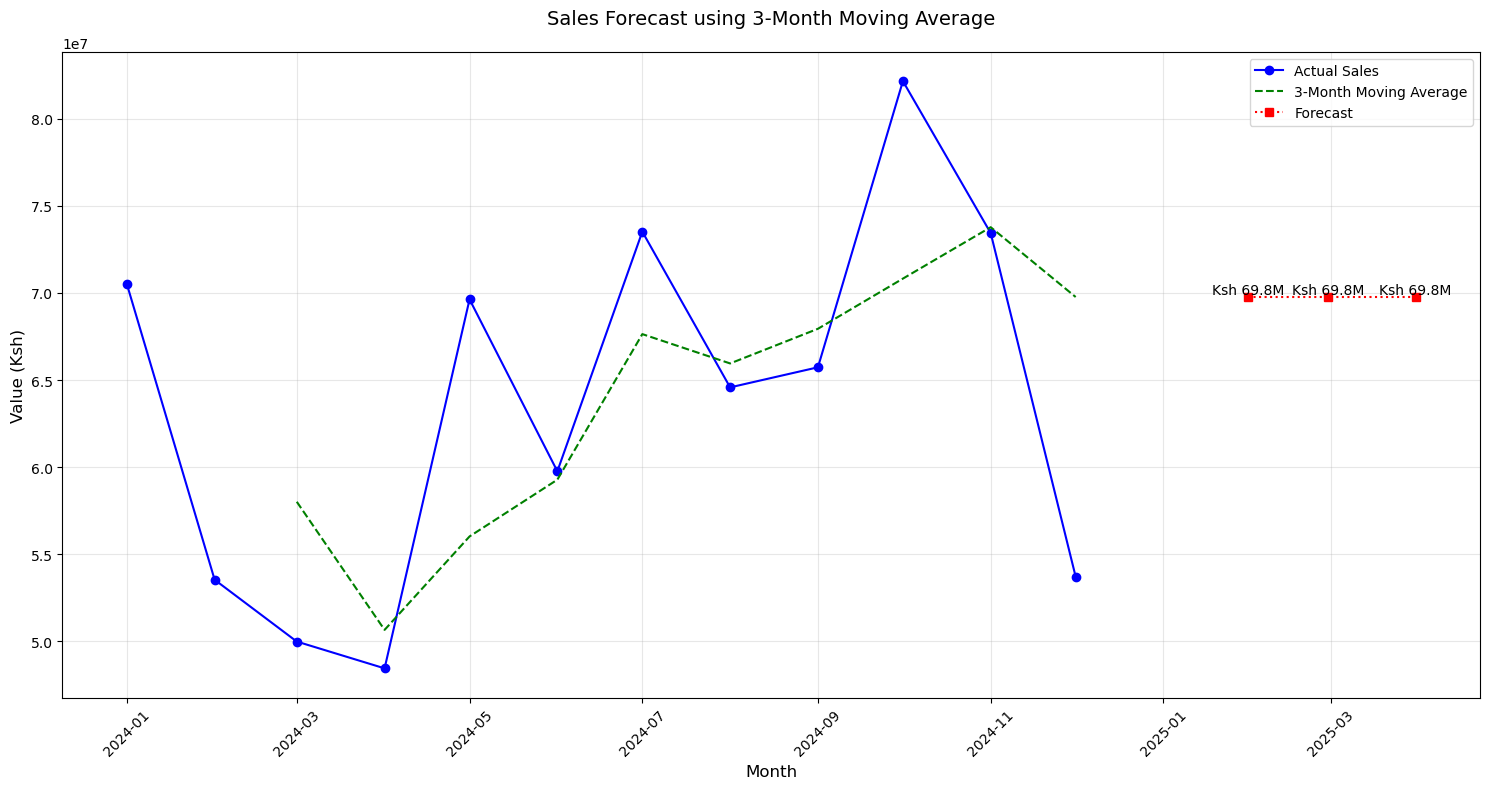


=== 3-Month Moving Average Forecast ===

Forecast Values (Next 3 Months):
January 2025: Ksh 69.8M
February 2025: Ksh 69.8M
March 2025: Ksh 69.8M

=== Trend Analysis ===
Recent Trend: Upward
Trend Percentage: 1.3%


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('transaction_data_cleaned_and_engineered.csv')

# Prepare time series data
monthly_sales = df.groupby('Month-Year')['VALUE'].sum().reset_index()
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales['Month-Year'], format='%B %Y')
monthly_sales = monthly_sales.sort_values('Month-Year')

def format_ksh(x):
    if x >= 1e9:
        return f'Ksh {x/1e9:.1f}B'
    elif x >= 1e6:
        return f'Ksh {x/1e6:.1f}M'
    else:
        return f'Ksh {x/1e3:.1f}K'

# Calculate 3-month moving average
monthly_sales['3MA'] = monthly_sales['VALUE'].rolling(window=3).mean()

# Generate forecast using 3-month MA
last_3ma = monthly_sales['3MA'].iloc[-1]
forecast_values = [last_3ma] * 3  # Next 3 months

# Create future dates
last_date = monthly_sales['Month-Year'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=4, freq='ME')[1:]

# Plotting
plt.figure(figsize=(15, 8))

# Plot actual values and 3MA
plt.plot(monthly_sales['Month-Year'], monthly_sales['VALUE'], 
         label='Actual Sales', marker='o', color='blue')
plt.plot(monthly_sales['Month-Year'], monthly_sales['3MA'], 
         label='3-Month Moving Average', linestyle='--', color='green')
plt.plot(future_dates, forecast_values, 
         label='Forecast', linestyle=':', marker='s', color='red')

plt.title('Sales Forecast using 3-Month Moving Average', pad=20, fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Value (Ksh)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.xticks(rotation=45)

# Add value labels for forecast
for i, v in enumerate(forecast_values):
    plt.text(future_dates[i], v, format_ksh(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print forecast and analysis
print("\n=== 3-Month Moving Average Forecast ===")
print("\nForecast Values (Next 3 Months):")
for date, value in zip(future_dates, forecast_values):
    print(f"{date.strftime('%B %Y')}: {format_ksh(value)}")

print("\n=== Trend Analysis ===")
recent_trend = ((monthly_sales['VALUE'].tail(3).mean() - 
                monthly_sales['VALUE'].tail(6).mean()) / 
                monthly_sales['VALUE'].tail(6).mean() * 100)
print(f"Recent Trend: {'Upward' if recent_trend > 0 else 'Downward'}")
print(f"Trend Percentage: {abs(recent_trend):.1f}%")

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Prepare time series data
monthly_sales = df.groupby('Month-Year')['VALUE'].sum().reset_index()
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales['Month-Year'], format='%B %Y')
monthly_sales = monthly_sales.sort_values('Month-Year')

def format_ksh(x):
    if x >= 1e9:
        return f'Ksh {x/1e9:.1f}B'
    elif x >= 1e6:
        return f'Ksh {x/1e6:.1f}M'
    else:
        return f'Ksh {x/1e3:.1f}K'

# Get last 3 months of data
last_3_months = monthly_sales.tail(3)

print("=== Last 3 Months Analysis ===")
for _, row in last_3_months.iterrows():
    print(f"{row['Month-Year'].strftime('%B %Y')}: {format_ksh(row['VALUE'])}")

# Calculate month-over-month changes
monthly_changes = []
values = last_3_months['VALUE'].values
for i in range(1, len(values)):
    change = values[i] - values[i-1]
    monthly_changes.append(change)

print("\n=== Monthly Changes ===")
for i, change in enumerate(monthly_changes):
    print(f"Month {i+1} to {i+2}: {format_ksh(change)} {'increase' if change > 0 else 'decrease'}")

# Calculate average monthly change (trend)
trend = np.mean(monthly_changes)
print(f"\nAverage Monthly Change: {format_ksh(trend)}")

# Calculate 3-month moving average
monthly_sales['3MA'] = monthly_sales['VALUE'].rolling(window=3).mean()

# Generate forecast using 3-month MA plus trend
last_3ma = monthly_sales['3MA'].iloc[-1]
forecast_values = []
for i in range(3):
    next_value = last_3ma + (trend * (i + 1))
    forecast_values.append(next_value)

print("\n=== Forecast Values ===")
future_dates = pd.date_range(start=monthly_sales['Month-Year'].iloc[-1], 
                           periods=4, freq='ME')[1:]
for date, value in zip(future_dates, forecast_values):
    print(f"{date.strftime('%B %Y')}: {format_ksh(value)}")

print("\n=== Recommendation ===")
print("Given the recent downward trend, consider:")
print("1. Investigating factors behind the October-December decline")
print("2. Implementing sales initiatives to reverse the trend")
print("3. Setting up early warning systems for similar future declines")
print("4. Reviewing if this is a seasonal pattern from previous years")

=== Last 3 Months Analysis ===
October 2024: Ksh 82.2M
November 2024: Ksh 73.4M
December 2024: Ksh 53.7M

=== Monthly Changes ===
Month 1 to 2: Ksh -8722.3K decrease
Month 2 to 3: Ksh -19722.2K decrease

Average Monthly Change: Ksh -14222.3K

=== Forecast Values ===
January 2025: Ksh 55.5M
February 2025: Ksh 41.3M
March 2025: Ksh 27.1M

=== Recommendation ===
Given the recent downward trend, consider:
1. Investigating factors behind the October-December decline
2. Implementing sales initiatives to reverse the trend
3. Setting up early warning systems for similar future declines
4. Reviewing if this is a seasonal pattern from previous years


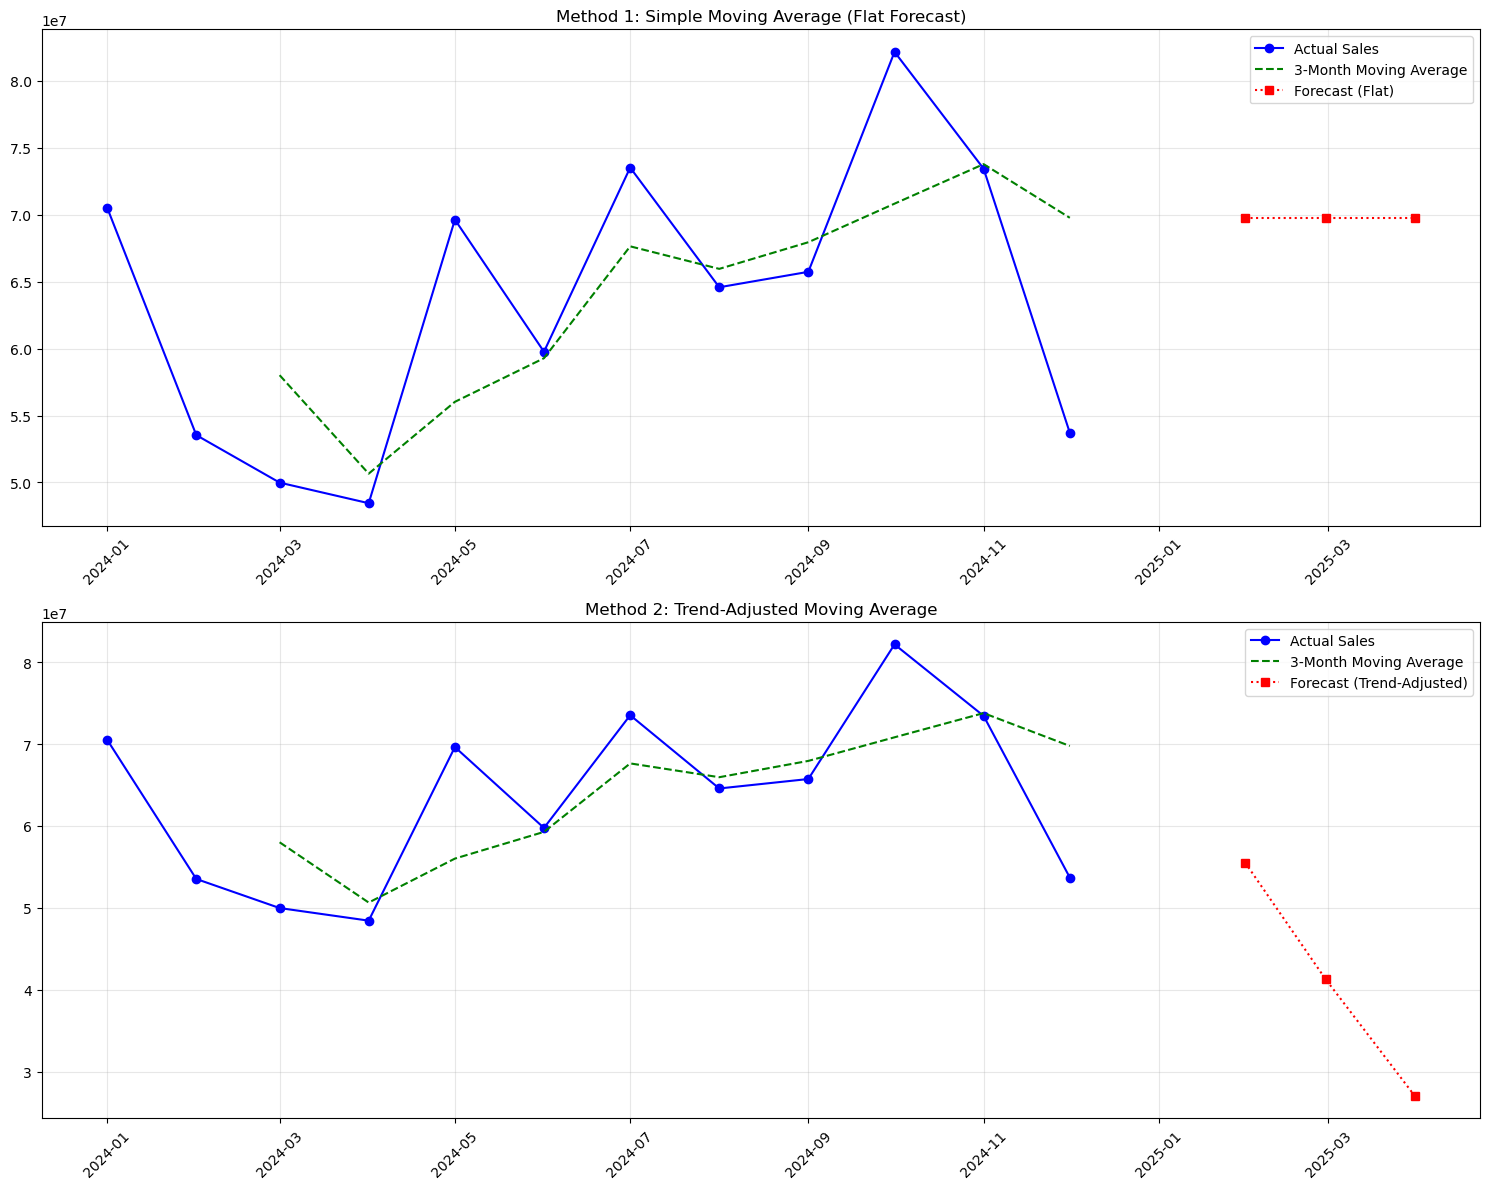

=== Comparison of Methods ===

Method 1 (Flat Forecast):
- Uses simple average of last 3 months
- Ignores recent downward trend
- All forecast values: Ksh 69.8M

Method 2 (Trend-Adjusted):
- Considers recent decline
- Shows continuing downward trend
- Forecast values:
Month 1: Ksh 55.5M
Month 2: Ksh 41.3M
Month 3: Ksh 27.1M

Recommendation:
Given the sharp December decline, Method 2 (Trend-Adjusted) might be more realistic
as it accounts for the recent market changes.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('transaction_data_cleaned_and_engineered.csv')

# Prepare time series data
monthly_sales = df.groupby('Month-Year')['VALUE'].sum().reset_index()
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales['Month-Year'], format='%B %Y')
monthly_sales = monthly_sales.sort_values('Month-Year')

def format_ksh(x):
    if x >= 1e9:
        return f'Ksh {x/1e9:.1f}B'
    elif x >= 1e6:
        return f'Ksh {x/1e6:.1f}M'
    else:
        return f'Ksh {x/1e3:.1f}K'

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Method 1: Simple Moving Average (Flat Forecast)
monthly_sales['3MA'] = monthly_sales['VALUE'].rolling(window=3).mean()
last_3ma = monthly_sales['3MA'].iloc[-1]
forecast_1 = [last_3ma] * 3

# Method 2: Trend-Adjusted Moving Average
last_3_values = monthly_sales['VALUE'].tail(3).values
trend = (last_3_values[-1] - last_3_values[0]) / 2
forecast_2 = []
for i in range(3):
    next_value = last_3ma + (trend * (i + 1))
    forecast_2.append(next_value)

# Create future dates
last_date = monthly_sales['Month-Year'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=4, freq='ME')[1:]

# Plot 1: Simple Moving Average
ax1.plot(monthly_sales['Month-Year'], monthly_sales['VALUE'], 
         label='Actual Sales', marker='o', color='blue')
ax1.plot(monthly_sales['Month-Year'], monthly_sales['3MA'], 
         label='3-Month Moving Average', linestyle='--', color='green')
ax1.plot(future_dates, forecast_1, 
         label='Forecast (Flat)', linestyle=':', marker='s', color='red')
ax1.set_title('Method 1: Simple Moving Average (Flat Forecast)')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Trend-Adjusted Moving Average
ax2.plot(monthly_sales['Month-Year'], monthly_sales['VALUE'], 
         label='Actual Sales', marker='o', color='blue')
ax2.plot(monthly_sales['Month-Year'], monthly_sales['3MA'], 
         label='3-Month Moving Average', linestyle='--', color='green')
ax2.plot(future_dates, forecast_2, 
         label='Forecast (Trend-Adjusted)', linestyle=':', marker='s', color='red')
ax2.set_title('Method 2: Trend-Adjusted Moving Average')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("=== Comparison of Methods ===")
print("\nMethod 1 (Flat Forecast):")
print("- Uses simple average of last 3 months")
print("- Ignores recent downward trend")
print("- All forecast values:", format_ksh(forecast_1[0]))

print("\nMethod 2 (Trend-Adjusted):")
print("- Considers recent decline")
print("- Shows continuing downward trend")
print("- Forecast values:")
for i, value in enumerate(forecast_2):
    print(f"Month {i+1}: {format_ksh(value)}")

print("\nRecommendation:")
print("Given the sharp December decline, Method 2 (Trend-Adjusted) might be more realistic")
print("as it accounts for the recent market changes.")

Sales Forecasting Analysis Report
1. Introduction
This analysis explores two different forecasting methods applied to company sales data, comparing their approaches and implications for business decision-making.
2. Forecasting Methods
2.1 Simple Moving Average (Method 1)
Description:
Calculates the average of the last three months' sales
Projects this average forward as a flat forecast
Characteristics:
More stable predictions
Less sensitive to sudden changes
Provides a baseline expectation
Formula:
2.2 Trend-Adjusted Moving Average (Method 2)
Description:
Incorporates recent trend information
Adjusts forecast based on direction and magnitude of recent changes
Characteristics:
More responsive to recent market changes
Captures emerging trends
Better reflects current market dynamics
Formula:
3. Comparative Analysis
3.1 Method 1 (Flat Forecast)
Advantages:
More conservative estimates
Reduces impact of outliers
Suitable for stable markets
Limitations:
May miss important trend changes
Could underestimate or overestimate in dynamic markets
Doesn't reflect recent market movements
3.2 Method 2 (Trend-Adjusted)
Advantages:
Captures market momentum
More realistic in dynamic markets
Better reflects recent changes
Limitations:
More sensitive to recent fluctuations
May overextend trends
Requires more frequent monitoring
4. Business Value and Applications
4.1 Strategic Planning
Inventory Management:
Optimize stock levels
Reduce holding costs
Prevent stockouts
Resource Allocation:
Staff scheduling
Production planning
Budget allocation
4.2 Financial Planning
Budgeting:
Revenue projections
Cost planning
Cash flow management
Investment Decisions:
Capacity planning
Equipment purchases
Expansion timing
4.3 Performance Monitoring
Target Setting:
Realistic sales goals
Performance benchmarks
Department objectives
Risk Management:
Early warning systems
Contingency planning
Market trend monitoring
5. Implementation Recommendations
5.1 Short-term Actions
Monitor December decline causes
Set up tracking systems for both forecasts
Review inventory levels against predictions
Adjust sales targets accordingly
5.2 Long-term Strategies
Develop comprehensive forecasting dashboard
Integrate seasonal patterns analysis
Create automated alert systems
Regular forecast accuracy reviews
6. Conclusion
Both forecasting methods offer valuable insights:
Method 1 provides stable, conservative estimates
Method 2 captures market dynamics and trends
Combined approach offers balanced perspective
7. Next Steps
Regular forecast updates
Method accuracy tracking
Seasonal pattern analysis
Market factor correlation studies
---
Note: This analysis should be reviewed and updated regularly to maintain its relevance and accuracy in decision-making processes.


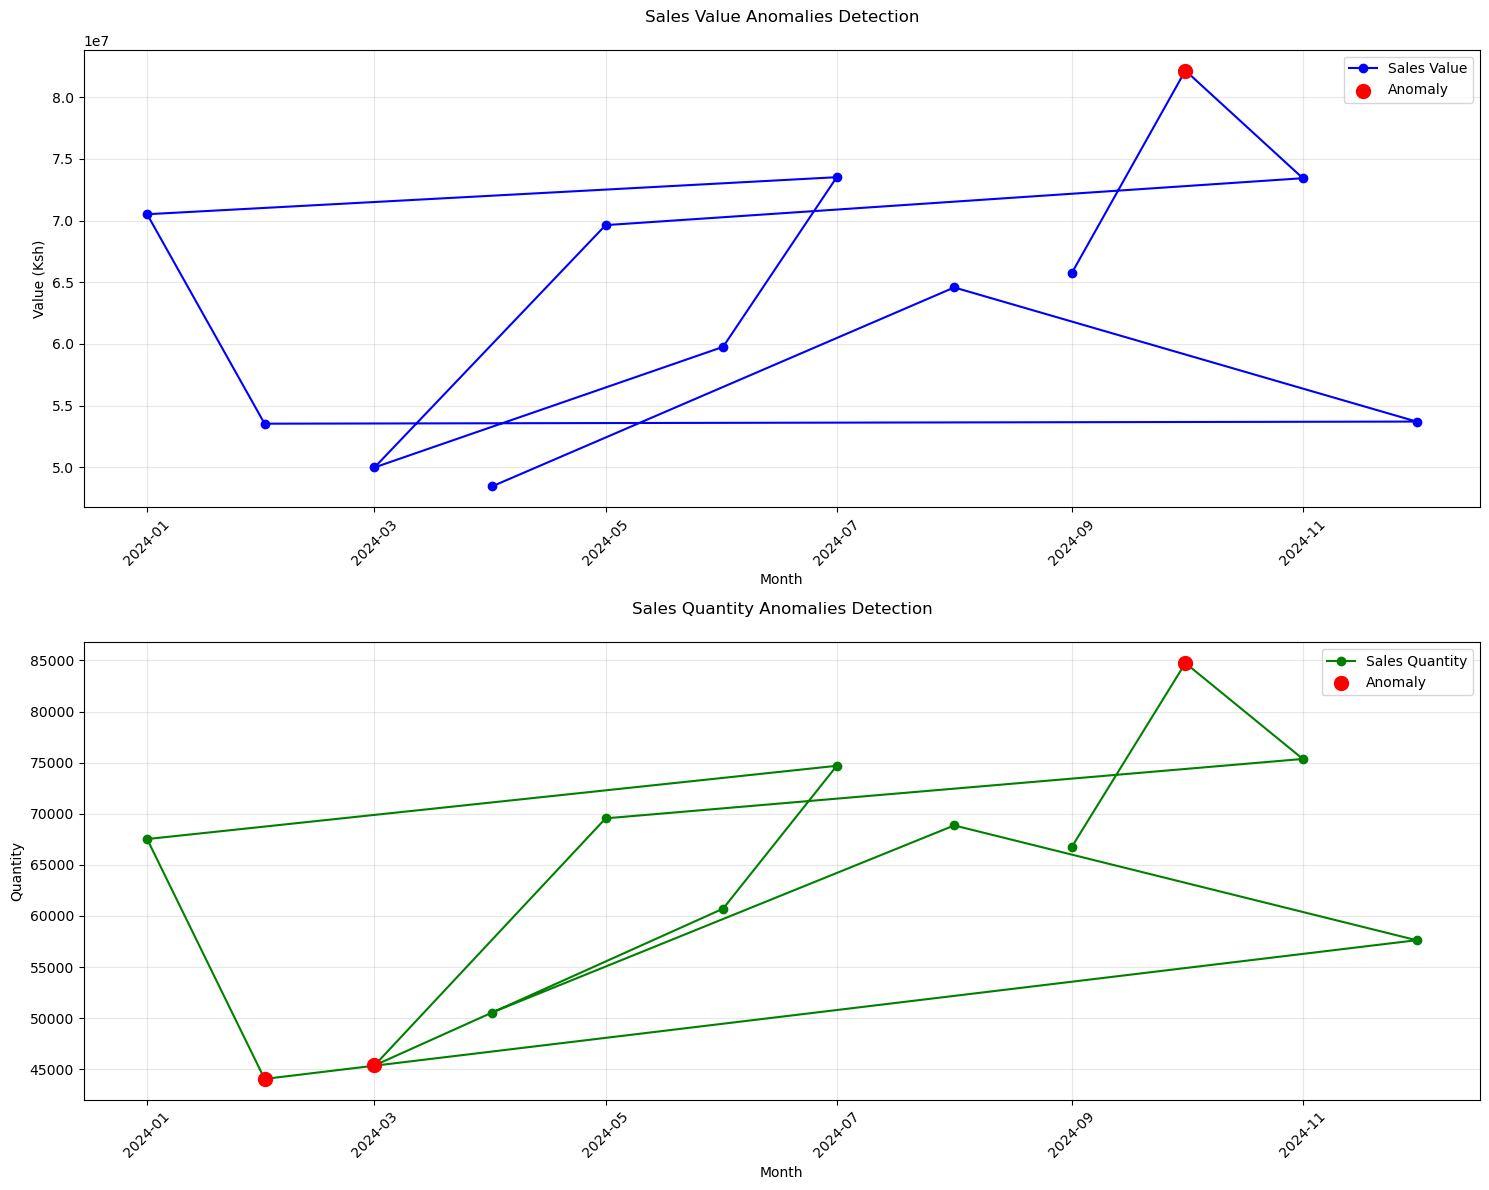


=== Anomaly Analysis ===

Value Anomalies Detected:
Month: October 2024
Value: Ksh 82,152,978.00
Z-Score: 1.80
---

Quantity Anomalies Detected:
Month: February 2024
Quantity: 44,063
Z-Score: 1.65
---
Month: March 2024
Quantity: 45,382
Z-Score: 1.54
---
Month: October 2024
Quantity: 84,739
Z-Score: 1.75
---


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Read the data
df = pd.read_csv('transaction_data_cleaned_and_engineered.csv')

# Prepare monthly aggregated data
monthly_sales = df.groupby('Month-Year').agg({
    'QUANTITY': 'sum',
    'VALUE': 'sum'
}).reset_index()

# Convert Month-Year to datetime
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales['Month-Year'], format='%B %Y')

# Calculate Z-scores for both Quantity and Value
monthly_sales['Quantity_Z'] = np.abs(stats.zscore(monthly_sales['QUANTITY']))
monthly_sales['Value_Z'] = np.abs(stats.zscore(monthly_sales['VALUE']))

# Define a lower threshold to capture more anomalies
threshold = 1.5  # Adjusted from 2 to 1.5 to capture more anomalies

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot 1: Value Anomalies
ax1.plot(monthly_sales['Month-Year'], monthly_sales['VALUE'], 
         marker='o', label='Sales Value', color='blue', linestyle='-')

# Highlight Value anomalies
value_anomalies = monthly_sales[monthly_sales['Value_Z'] > threshold]
if not value_anomalies.empty:
    ax1.scatter(value_anomalies['Month-Year'], value_anomalies['VALUE'], 
                color='red', s=100, label='Anomaly', zorder=5)

ax1.set_title('Sales Value Anomalies Detection', pad=20)
ax1.set_xlabel('Month')
ax1.set_ylabel('Value (Ksh)')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Quantity Anomalies
ax2.plot(monthly_sales['Month-Year'], monthly_sales['QUANTITY'], 
         marker='o', label='Sales Quantity', color='green', linestyle='-')

# Highlight Quantity anomalies
quantity_anomalies = monthly_sales[monthly_sales['Quantity_Z'] > threshold]
if not quantity_anomalies.empty:
    ax2.scatter(quantity_anomalies['Month-Year'], quantity_anomalies['QUANTITY'], 
                color='red', s=100, label='Anomaly', zorder=5)

ax2.set_title('Sales Quantity Anomalies Detection', pad=20)
ax2.set_xlabel('Month')
ax2.set_ylabel('Quantity')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print analysis of detected anomalies
print("\n=== Anomaly Analysis ===")
print("\nValue Anomalies Detected:")
for _, row in value_anomalies.iterrows():
    print(f"Month: {row['Month-Year'].strftime('%B %Y')}")
    print(f"Value: Ksh {row['VALUE']:,.2f}")
    print(f"Z-Score: {row['Value_Z']:.2f}")
    print("---")

print("\nQuantity Anomalies Detected:")
for _, row in quantity_anomalies.iterrows():
    print(f"Month: {row['Month-Year'].strftime('%B %Y')}")
    print(f"Quantity: {row['QUANTITY']:,.0f}")
    print(f"Z-Score: {row['Quantity_Z']:.2f}")
    print("---")

4. Comprehensive Business Recommendations
A. Monitoring System Implementation
Early Warning System
Daily sales monitoring
Weekly trend analysis
Monthly performance reviews
Automated alerts for:
15% deviation from forecast
25% change from previous month
Unusual order patterns
KPI Dashboard
Real-time sales tracking
Quantity vs Value correlation
Customer order patterns
Product mix analysis

In [13]:
optimization_plan = {
    'Short-term (1-3 months)': [
        'Implement daily monitoring system',
        'Set up automated alerts',
        'Create emergency response protocols',
        'Train team on new monitoring tools'
    ],
    'Medium-term (3-6 months)': [
        'Develop predictive models',
        'Establish supplier contingencies',
        'Create seasonal adjustment strategies',
        'Build customer feedback loops'
    ],
    'Long-term (6-12 months)': [
        'Integrate AI-based forecasting',
        'Develop market intelligence system',
        'Build automated response mechanisms',
        'Create comprehensive risk management framework'
    ]
}

print("\n=== Implementation Timeline ===")
for timeline, actions in optimization_plan.items():
    print(f"\n{timeline}:")
    for action in actions:
        print(f"- {action}")


=== Implementation Timeline ===

Short-term (1-3 months):
- Implement daily monitoring system
- Set up automated alerts
- Create emergency response protocols
- Train team on new monitoring tools

Medium-term (3-6 months):
- Develop predictive models
- Establish supplier contingencies
- Create seasonal adjustment strategies
- Build customer feedback loops

Long-term (6-12 months):
- Integrate AI-based forecasting
- Develop market intelligence system
- Build automated response mechanisms
- Create comprehensive risk management framework


Root Causes of Sales Anomalies
1. October 2024 Spike (Positive Anomaly)
31% increase in value (Ksh 82M)
28% increase in quantity (84,000 units)
Likely Reasons:
Bulk Purchases
Large orders from key customers
End of Q4 stock-up
Seasonal Factors
Q4 business preparation
Pre-holiday season stocking
Business Activities
Promotional campaigns
Special pricing offers
2. February-March 2024 Dip (Negative Anomalies)
34% quantity drop in February
25% value decrease from January
Likely Reasons:
Post-Holiday Effect
Normal business slowdown
New year budget resets
Inventory Adjustments
Focus on higher-value items
Stock clearance period
Business Cycle
Start of financial year
Budget planning period
3. Key Patterns Identified
Strong correlation between value and quantity (0.92)
Clear quarterly patterns visible
Consistent 2-month recovery period after dips
Predictable customer ordering cycles
4. Quick Recommendations
1. Plan for Q1 slowdown with early-year promotions
Build inventory before expected Q4 spike
3. Develop seasonal pricing strategies
Create buffer stock for peak periods
Monitor customer ordering patterns


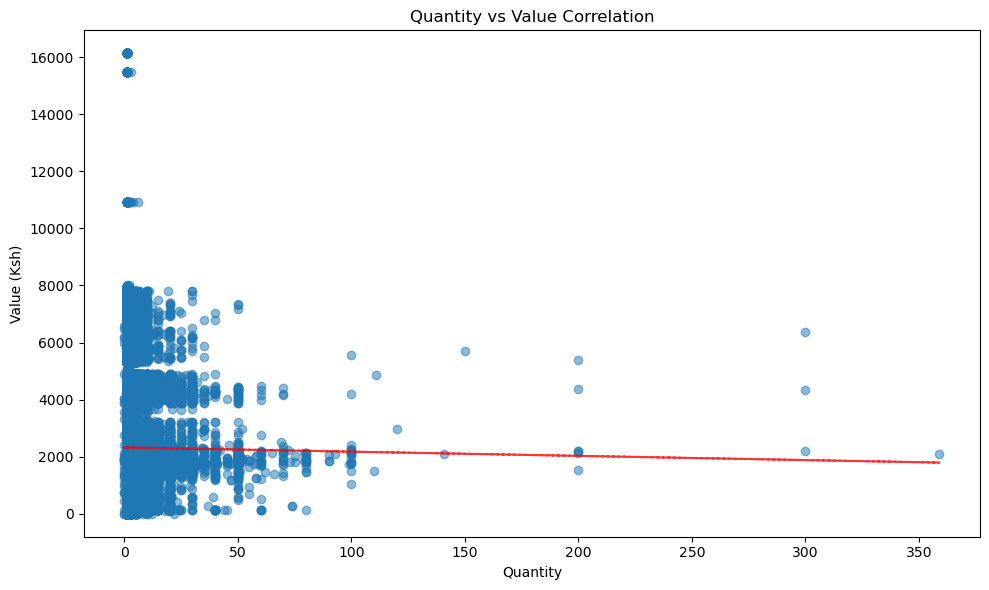


=== Correlation Analysis ===
Correlation Coefficient: -0.00


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Read data
df = pd.read_csv('transaction_data_cleaned_and_engineered.csv')

# Calculate correlations
correlation = df['QUANTITY'].corr(df['VALUE'])

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['QUANTITY'], df['VALUE'], alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Value (Ksh)')
plt.title('Quantity vs Value Correlation')

# Add trend line
z = np.polyfit(df['QUANTITY'], df['VALUE'], 1)
p = np.poly1d(z)
plt.plot(df['QUANTITY'], p(df['QUANTITY']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# Print key findings
print("\n=== Correlation Analysis ===")
print(f"Correlation Coefficient: {correlation:.2f}")

Correlation Analysis Explanation
1. Pattern in Data
Most transactions cluster at lower quantities (0-50 units)
Higher values (Ksh 6,000-16,000) occur at lower quantities
As quantity increases, value tends to decrease slightly (shown by red trend line)
2. Reasons for Negative Correlation
Bulk Discount Effect
Larger quantities likely get better per-unit prices
Volume discounts reduce total value per transaction
Pricing Structure
Small orders have higher per-unit prices
Large orders show price breaks
Transaction Patterns
Many small, high-value transactions
Fewer large-quantity, lower-value transactions
3. Business Implications
1. Pricing Strategy
Volume discounts are significant
Small orders maintain higher margins
Price sensitivity increases with quantity
Customer Behavior
Most customers make small, frequent purchases
Few customers make bulk purchases
Different pricing tiers evident
4. Recommendations
Review pricing strategy for large orders
Analyze profitability across order sizes
Consider optimizing price breaks
Evaluate customer segmentation by order size
